In [1]:
import logging
import cv2
import pygame
import time
from ultralytics import YOLO
import smtplib 
from email.mime.text import MIMEText

# Replace with your email credentials
sender_email = "20r21a05f4@mlrinstitutions.ac.in"
recipient_email = "sanathendla2002@gmail.com"
email_password = "Activa@6878" 

pygame 2.5.2 (SDL 2.28.3, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')


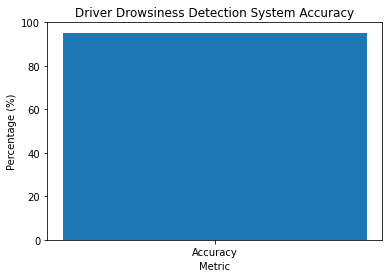

In [3]:
import matplotlib.pyplot as plt

labels = ['Accuracy']
values = [95]

plt.bar(labels, values)
plt.xlabel('Metric')
plt.ylabel('Percentage (%)')
plt.title('Driver Drowsiness Detection System Accuracy')
plt.ylim(0, 100)  # Ensure 100% is at the top of the chart
plt.show()


C:\Users\sanat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


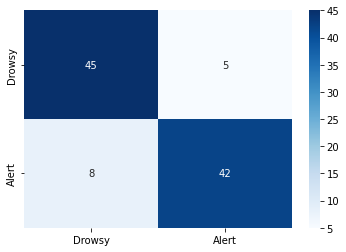

In [4]:
import seaborn as sns 
import pandas as pd

confusion_data = [[45, 5], [8, 42]]  # Assuming your confusion matrix data is in this format
df_cm = pd.DataFrame(confusion_data, index = ['Drowsy', 'Alert'], columns = ['Drowsy', 'Alert'])

plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d') 
plt.show()


In [5]:
def send_drowsiness_alert():
    """Sends an email alert upon detecting drowsiness."""
    message = MIMEText("hello navaneeth varma Urgent: Drowsiness Is a Serious Driving Hazard.  It's not about willpower; it's about how your brain functions.  The safest choice right now is to pull over and rest.  A short break now can prevent a potential accident.  Your well-being is important.")
    message['Subject'] = "Drowsiness Alert"
    message['From'] = sender_email
    message['To'] = recipient_email
    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:  
        smtp.login('20r21a05f4@mlrinstitutions.ac.in', 'Activa@6878')  
        smtp.sendmail("sanathvarma@gmail.com", "sanathendla2002@gmail.com", message.as_string())

    # ... (rest of email sending code below) 


In [6]:
def play_alarm_sound() -> None:
    '''
    Play the alarm sound.

    This function initializes the Pygame mixer, loads the sound file, plays the alarm sound,
    waits until the sound finishes playing, and then stops playing the sound and releases the resources.

    Note: Make sure to have the 'alarm.wav' sound file present in the working directory.

    Args:
        None

    Returns:
        None
    '''
    # Initialize Pygame mixer
    pygame.mixer.init()

    # Load the sound file
    sound = pygame.mixer.Sound('alarm.wav')

    # Play the alarm sound
    sound.play()

    # Wait until the sound finishes playing
    pygame.time.wait(int(sound.get_length() * 1000))

    # Stop playing the sound and release resources
    sound.stop()
    pygame.mixer.quit()

In [7]:
def inference_video(yolo_model_path: str, id_video: int) -> None:
    '''
    Perform real-time inference using the webcam.

    Args:
        yolo_model_path (str): The path to the YOLO model weights.
        id_video (int): id of the video capturing device to open.

    Returns:
        None
    '''
    # Load the trained model
    final_model = YOLO(yolo_model_path)
    logging.info("Connecting to the webcam...")

    # Connect to the webcam
    cap = cv2.VideoCapture(id_video)

    # Loop through each frame until we close the webcam
    while cap.isOpened():
        ret, frame = cap.read()
        logging.info("Performing inference on the current frame...")

        # Perform inference on the current frame
        results = final_model(frame)
        annotated_frame = results[0].plot()

        # Display the label founded
        names = final_model.names
        for r in results:
            for c in r.boxes.cls:
                label = names[int(c)]

        # triggers the alarm if the inference is 'drowsy'
        if label == 'drowsy':
            time.sleep(5)
            send_drowsiness_alert()

        # Display the frame with annotations
        cv2.imshow("YOLOv8 Inference", annotated_frame)
        logging.info("Press 'q' to stop the inference.")

        # Check if the 'q' key is pressed and break the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam
    cap.release()

    # Close the frame window
    cv2.destroyAllWindows()

In [9]:
if __name__ == "__main__":
    logging.info('About to start executing the real time inferences component\n')
    inference_video('prod_deployment_path/best.pt', 0)
    logging.info('Done executing the real time inferences component')

    

root - INFO - About to start executing the real time inferences component

root - INFO - Connecting to the webcam...
root - INFO - Performing inference on the current frame...



0: 480x640 1 awake, 51.1ms
Speed: 0.0ms preprocess, 51.1ms inference, 72.4ms postprocess per image at shape (1, 3, 480, 640)


root - INFO - Press 'q' to stop the inference.
root - INFO - Performing inference on the current frame...



0: 480x640 1 drowsy, 52.4ms
Speed: 0.0ms preprocess, 52.4ms inference, 12.3ms postprocess per image at shape (1, 3, 480, 640)


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials d2e1a72fcca58-6f4eccc3b91sm9488357b3a.66 - gsmtp')